In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

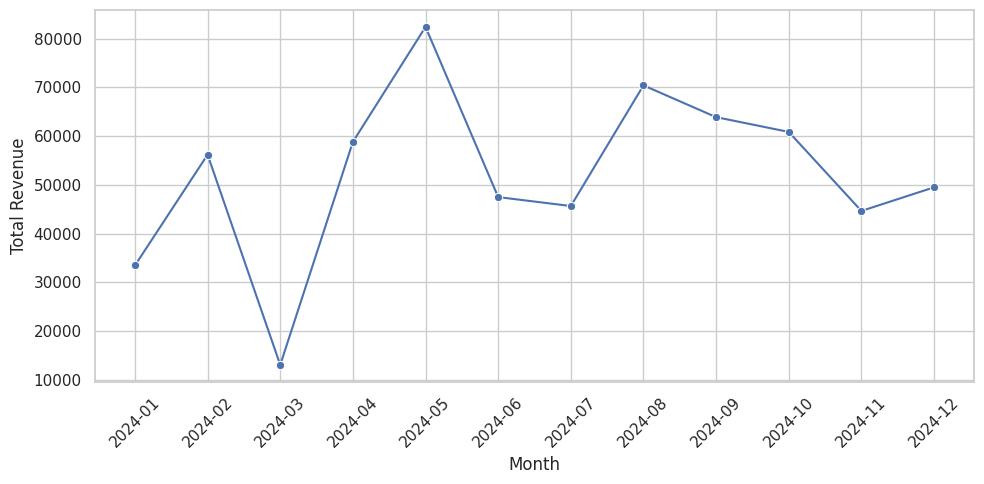

In [15]:
df=pd.read_csv('cleaned_sales_dataset.csv')
df['Invoice_Date_Clean']= pd.to_datetime(df['Invoice_Date_Clean'])
montly_sales = (
    df.groupby(df['Invoice_Date_Clean'].dt.to_period('M'))['Total_Amount_Clean']
    .sum().reset_index()
)

montly_sales['Invoice_Date_Clean'] = montly_sales['Invoice_Date_Clean'].astype(str)
plt.figure(figsize=(10,5))
sns.lineplot(data = montly_sales, x = 'Invoice_Date_Clean', y='Total_Amount_Clean', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


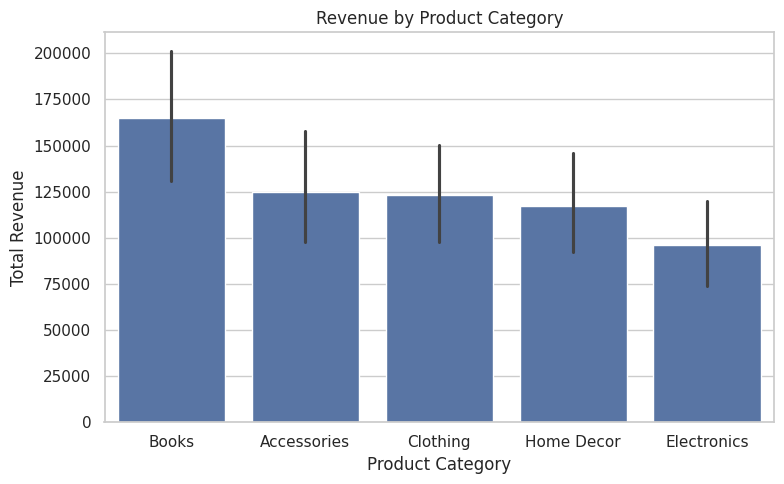

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data = df,
    x='Product_Category',
    y= 'Total_Amount_Clean',
    estimator= sum
)
plt.title("Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

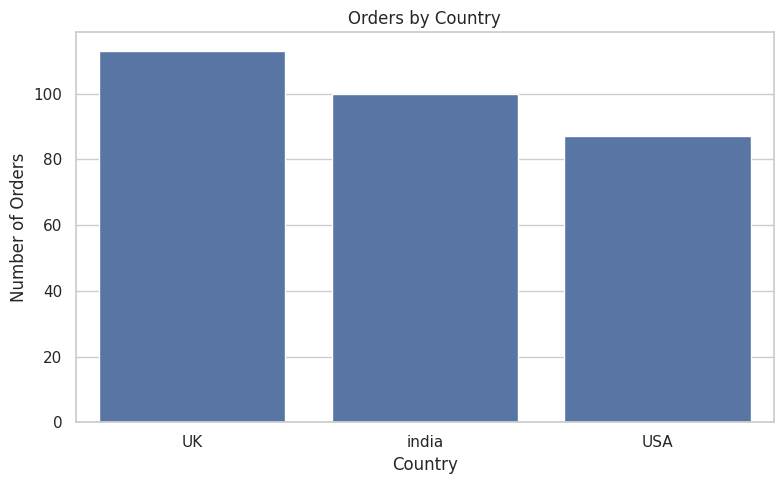

In [18]:
country_orders = df['Country_Clean'].value_counts().reset_index()
country_orders.columns = ['Country', 'Orders']

plt.figure(figsize=(8,5))
sns.barplot(data=country_orders, x='Country', y='Orders')
plt.title("Orders by Country")
plt.xlabel("Country")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


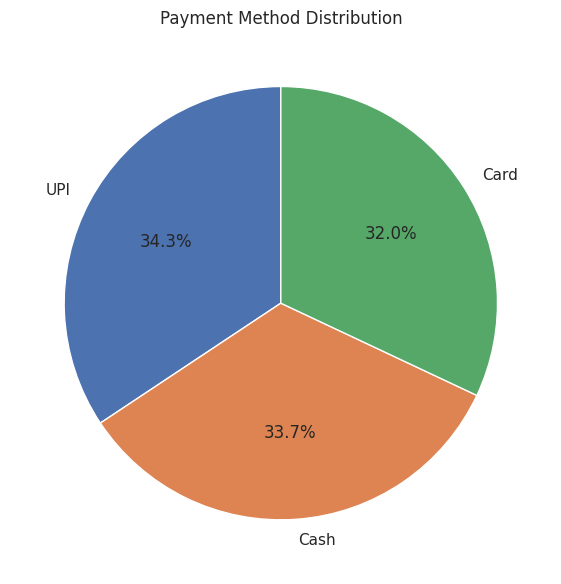

In [20]:
plt.figure(figsize=(6,6))
df['Payment_Mode_Clean'].value_counts().plot(
    kind= 'pie',
    autopct = '%1.1f%%',
    startangle = 90
)
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

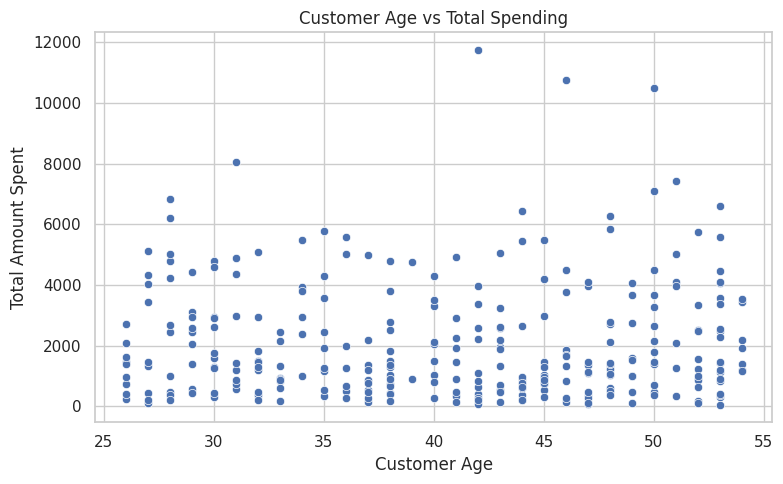

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='Customer_Age',
    y='Total_Amount_Clean'
)
plt.title("Customer Age vs Total Spending")
plt.xlabel("Customer Age")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()


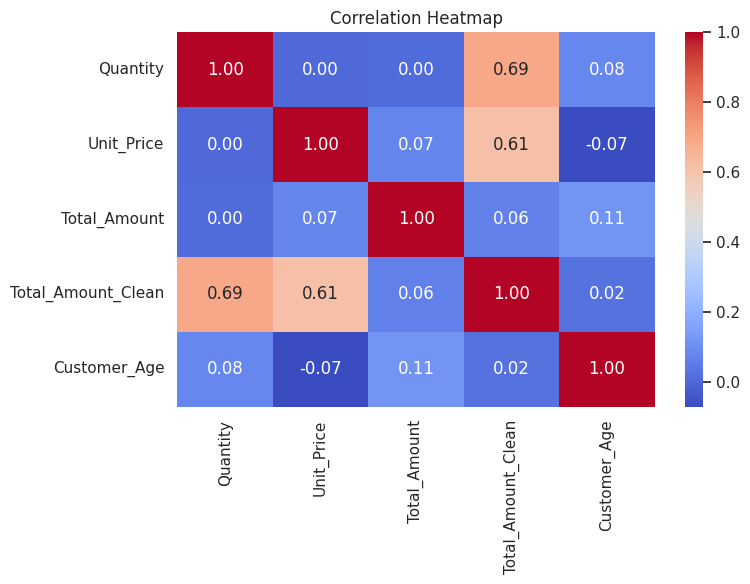

In [22]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=['int64', 'float64'])

sns.heatmap(
    numeric_df.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
